Setting Up the Environment
-------------



In [28]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

Data Preparation
-----------

In [3]:
# Load the Iris dataset
breast = load_breast_cancer()
X, y = breast.data, breast.target

# One-hot encode the target labels
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.reshape(-1, 1))

One-hot encoding transforms categorical or integer-based class labels into a binary matrix format, where each class label is represented as a vector.

In summary, we do this to make the target labels compatible with the model's expected output format, particularly for neural networks that require a specific structure for multi-class classification.

Data Distribution
-----------

Splitting the Data
------------

In [4]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Standardizing features improves the model’s performance, convergence speed, and stability by ensuring that each feature contributes comparably, and avoids any single feature from dominating due to its scale.

Build up the Model
--------

In [19]:
# Define the model architecture
model = Sequential([
    Dense(16, activation='tanh', input_shape=(X_train.shape[1],)),
    Dense(2, activation='softmax')  # Output layer with 3 classes
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model Training
------------

Adam optimizer to minimize the loss by updating model weights efficiently.

Categorical cross-entropy loss for multi-class classification, measuring the discrepancy between the predicted probabilities and the actual class labels.

verbose=1 shows a progress bar for each epoch, including the current loss and accuracy for both training and validation sets. It’s useful for monitoring the training process in real time.

In [16]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.1, verbose=1)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.5060 - loss: 0.9775 - val_accuracy: 0.7174 - val_loss: 0.6468
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6834 - loss: 0.7022 - val_accuracy: 0.7826 - val_loss: 0.4728
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8053 - loss: 0.5119 - val_accuracy: 0.8913 - val_loss: 0.3574
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8313 - loss: 0.4061 - val_accuracy: 0.9130 - val_loss: 0.2798
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8600 - loss: 0.3278 - val_accuracy: 0.9130 - val_loss: 0.2271
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8840 - loss: 0.2480 - val_accuracy: 0.9783 - val_loss: 0.1921
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8764 - loss: 0.2315 - val_accuracy: 0.9783 - val_loss: 0.1692
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9306 - loss: 0.1816 - val_accuracy: 0.9783 - 

Performance Evaluation
------------

Test Accuracy: 0.98


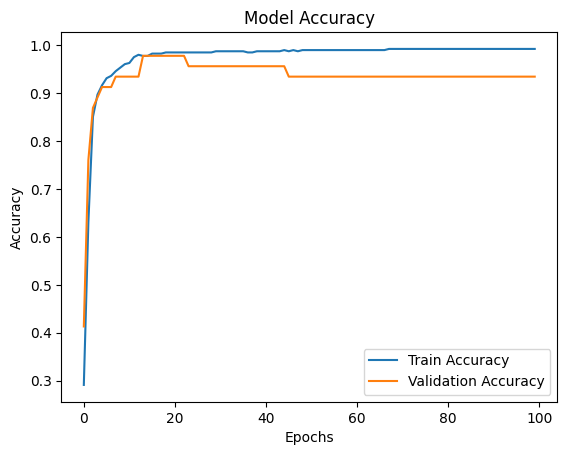

In [22]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


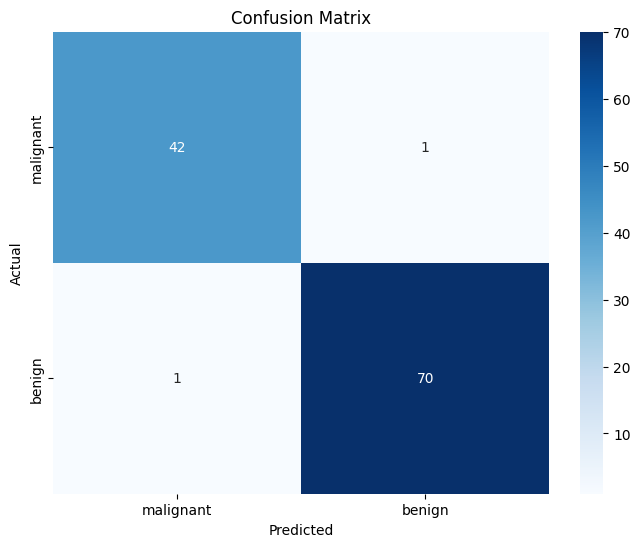

In [30]:

# Make predictions on the test data
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=breast.target_names, yticklabels=breast.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [33]:
#We define a function for easy code reusability
def train_with(algo):
  model = Sequential([
    Dense(16, activation=algo, input_shape=(X_train.shape[1],)),
    Dense(2, activation='softmax')  # Output layer with 3 classes
])

  # Compile the model

  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  # Train the model

  history = model.fit(X_train, y_train, epochs=100, validation_split=0.1, verbose=0)

  test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
  print(f"Test Accuracy: {test_accuracy:.2f}")

  # Make predictions on the test data
  y_pred_prob = model.predict(X_test)
  y_pred = np.argmax(y_pred_prob, axis=1)
  y_true = np.argmax(y_test, axis=1)

  conf_matrix = confusion_matrix(y_true, y_pred)

  # Visualize the confusion matrix
  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=breast.target_names, yticklabels=breast.target_names)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix')
  plt.show()

relu algorithm



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.97
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


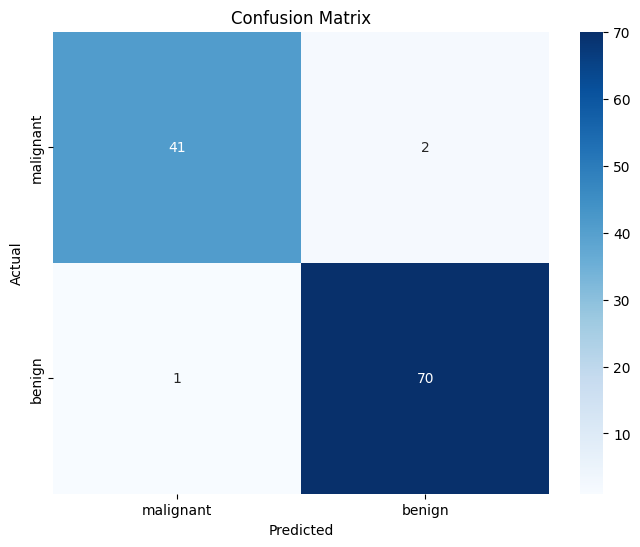

In [35]:
train_with("relu")

Sigmoid A.F

Test Accuracy: 0.98
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


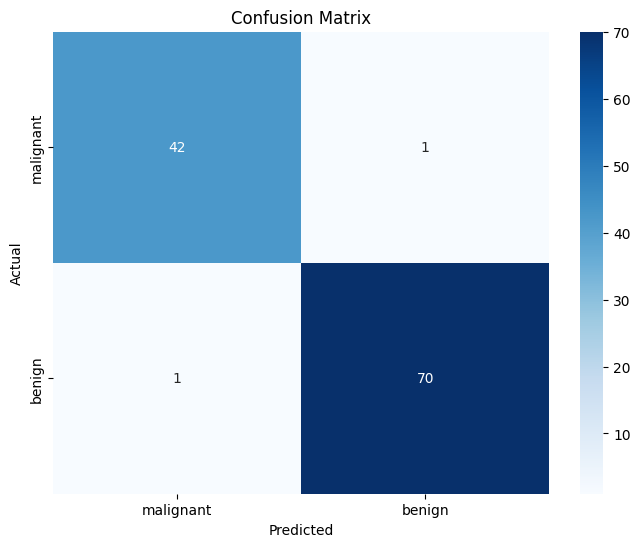

In [38]:
train_with('sigmoid') #thomas shelby sigma

Identity Activation Function

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.98
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


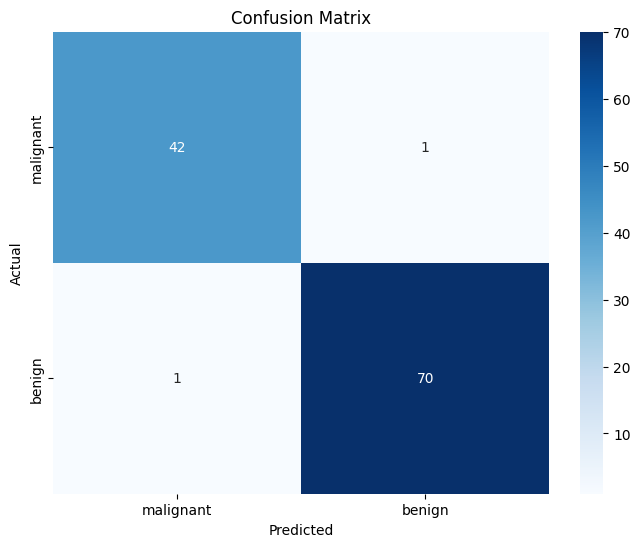

In [39]:
train_with('linear')

Step A.F